<div dir=rtl>

## מעבדה לפיסיקה 2

</center>

<h1><center>קבל</center></h1>

<div dir=rtl>
תיעוד ניסוי "קבל"<br>
    <font color='red'>אין קובץ עזר זה מחליף את תדריך הניסוי! למהלך הניסוי, יש לפנות לתדריך הניסוי!</font>
    
    גרסה 0.3.1
    
***
<div dir=rtl>
תאריך:
<div dir=rtl>
עמדה:
<div dir=rtl>
מבצעים/ות:


***
<div dir=rtl> <b> הערות: </b> <br>
    .
    
.
    
.
    
.
    

<div dir=rtl>

### ייבוא חבילות לעיבוד הנתונים ולקיחת מדידות

In [2]:
import math

import numpy as np  # math functions
import matplotlib.pyplot as plt  # for plotting figures and setting their properties
from scipy.integrate import cumulative_trapezoid  #  numerical integration, scipy<1.6
# from scipy.integrate import cumulative_trapezoid # numerical integration, scipy>=1.6
from scipy.stats import linregress  # linear regression
import scipy.constants as spc  # physical constants such as epsilon_0


epsilon_0 = spc.epsilon_0

<div dir=rtl>
<h1>
    מהלך הניסוי 
<a id="mahalah"></a>
</h1>

<div dir=rtl>
<h2>
    בחירת קבל 1 (הקבל בעל הקיבול הגדול ביותר): 
</h2> 

<a id="cap1"></a>
    
<br>
תיעוד בחירה: <br>
.

.

.

<div dir=rtl>
<h3>
    קיבול לפי נוסחא
</h3>

<div dir=rtl>
תזכורת:
$$ C = {A \varepsilon_0 \varepsilon_r \over d}$$

In [3]:
dist1 = ((0.63 + 0.84 + 0.87) / 3) / 1000  #[mm]
dist1_err = 0.01 / 1000  #

diam1 = 260 / 1000  # [mm]
diam1_err = 1 / 1000  # [mm]

epsilon1_eff = epsilon_0  #

C1_calc = (np.pi * (diam1 / 2) ** 2) * epsilon1_eff / dist1
### לא לשכוח לחשב את השגיאה!
C1_calc_err = math.hypot((np.pi * epsilon1_eff * diam1 / (2 * dist1)) * diam1_err,
                         (np.pi * epsilon1_eff * diam1 ** 2 / 4 * dist1 ** 2) * dist1_err)  #

### אפשר לעגל את השגיאה לסדר מוביל באמצעות:
C1_calc_err = np.round(C1_calc_err, abs(int(np.floor(np.log10(abs(C1_calc_err))))))
### והתאמה, נעגל את ערך הקיבול לאותו סדר גודל
C1_calc = np.round(C1_calc, abs(int(np.floor(np.log10(abs(C1_calc_err))))))

### נציג את שניהם:
print(f"{C1_calc:e} ± {C1_calc_err:e}")

### לחלופין, אפשר גם:
decimals = abs(int(np.floor(np.log10(abs(C1_calc_err)))))
print(f"({(n1 := C1_calc / 10 ** (exp := int(f'{C1_calc:.1e}'.split('e')[1]))):.{decimals}f}".rstrip('0').rstrip(
    '.') + f" ± {(n2 := C1_calc_err / 10 ** exp):.{decimals}f}".rstrip('0').rstrip('.') + f")e{exp:+d}")
## או אפילו:
from IPython.display import display, Math


display(Math(f"({(n1 := C1_calc / 10 ** (exp := int(f'{C1_calc:.1e}'.split('e')[1]))):.{decimals}f}".rstrip('0').rstrip(
    '.') + f" \pm {(n2 := C1_calc_err / 10 ** exp):.{decimals}f}".rstrip('0').rstrip(
    '.') + f")\\times 10^{{{exp:+d}}}"))


6.030000e-10 ± 5.000000e-12
(6.03 ± 0.05)e-10


<>:30: SyntaxWarning: invalid escape sequence '\p'
<>:30: SyntaxWarning: invalid escape sequence '\p'
C:\Users\danda\AppData\Local\Temp\ipykernel_14664\1207489406.py:30: SyntaxWarning: invalid escape sequence '\p'
  '.') + f" \pm {(n2 := C1_calc_err / 10 ** exp):.{decimals}f}".rstrip('0').rstrip(


<IPython.core.display.Math object>

<div dir=rtl>
<h3>
   מדידות מקדימות:
</h3>

In [4]:
# Charge resistor:
R1 = 75.30 * 1000  # [Ohm]
R1_err = R1 * 0.050 + 0.005 * 100_000
# Current measurement resistor:
R2 = 0.97120 * 1000  # [Ohm]
R2_err = R2 * 0.050 + 0.008 * 1_000

print(f"{R1=:e}+-{R1_err=:e}, {R2:e} <UNK> {R2_err:e}")

R1=7.530000e+04+-R1_err=4.265000e+03, 9.712000e+02 <UNK> 5.656000e+01


<div dir=rtl>
<h3>
    קיבול לפי מד הLCR
</h3>


<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> איך כדאי למקם חוטי המדידה בכדי למזער את השפעתם על מדידת קיבול הקבל?
</div>

In [9]:
C1_LCR = (0.474* 1e-9)  #[nano farad]
C1_LCR_err = C1_LCR * 0.01 + 3 * 0.001 * 1e-9

print(f"{C1_LCR:e} ± {C1_LCR_err:e}")

4.740000e-10 ± 7.740000e-12


<div dir=rtl>
<h3>
    קיבול לפי $Q=CV$
</h3>

<div class="alert alert-block alert-success", dir=rtl>
<b>רגע של מחשבה:</b> מה משתנה כתלות בערכו של R1?
</div>

<div dir=rtl>
טעינת הנתונים מקובץ:

In [6]:
### נתזכר כי כבר יצא לנו לטעון נתונים מקובץ:
def importData(filename):
    # use skiprows=46 to skip the scope setup information
    # python starts count columns from 0
    t, v1, v2 = np.loadtxt(filename, delimiter=',', skiprows=2, usecols=[3, 4, 5]).T
    return t, v1, v2


t_C1, V1_C1, V2_C1 = importData("data.csv")
V1_C1 /= 10
V2_C1 /= 10
t_C1  #, V1_C1, V2_C1
len(t_C1)

baseline_measurements = V1_C1[-80:]
baseline_average = np.average(baseline_measurements)
vvv = V1_C1.copy()
V1_C1 -= baseline_average

<div dir=rtl>
חישוב המתח על הקבל והזרם במעגל:

In [7]:
positive_values = V2_C1[V2_C1 > 0]
negative_values = V2_C1[V2_C1 < 0]

avg_positive = positive_values.mean() if positive_values.size > 0 else float('nan')
avg_negative = negative_values.mean() if negative_values.size > 0 else float('nan')

print("Average of positive values:", avg_positive)
print("Average of negative values:", avg_negative)


Average of positive values: 0.003585317855417406
Average of negative values: -0.00843072044149804


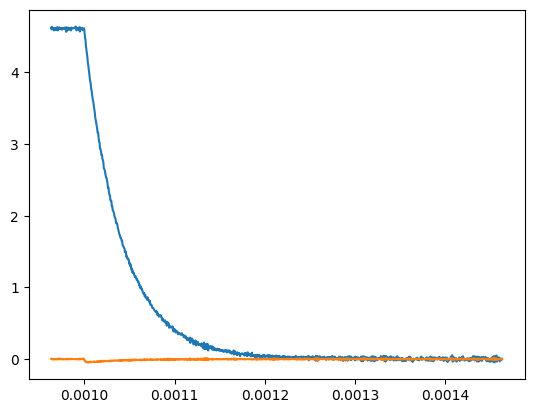

In [8]:
V_C1 = V1_C1  # [V]
V_C1_err = np.abs(V_C1 * (0.03 / 2))
I_C1 = V2_C1 / R2  # [q/t]
I_C1_err = (V2_C1) / (R2 ** 2) * R2_err

start = np.argmin(V_C1)
plt.plot(t_C1, V1_C1, label='V1 C1')
plt.plot(t_C1, V2_C1, label='V1 C1')

<div dir=rtl>
אינטרגציה לזרם בשביל לקבל את המטען:

In [9]:
Q_C1 = cumulative_trapezoid(I_C1, t_C1, initial=0)  #- baseline_average
Qnew_C1 = Q_C1 + abs(min(Q_C1))

<div dir=rtl>
גרף של המטען הצבור בקבל כתלות במתח על הקבל:

In [10]:
def sci_notation(val, err, precision=2):
    exponent = int(np.floor(np.log10(abs(val)))) if val != 0 else 0
    base = round(val / (10 ** exponent), precision)
    err_exp = int(np.floor(np.log10(abs(err)))) if err != 0 else 0
    err_base = round(err / (10 ** exponent), precision)
    return fr"{base} \times 10^{{{exponent}}} \pm {err_base} \times 10^{{{exponent}}}"


def split_sci(val, err, precision=3):
    if val == 0:
        return "0", "0", "0"
    exponent = int(np.floor(np.log10(abs(val))))
    base = round(val / 10 ** exponent, precision)
    err_base = round(err / 10 ** exponent, precision)
    return f"{base}", f"{err_base}", f"{exponent}"

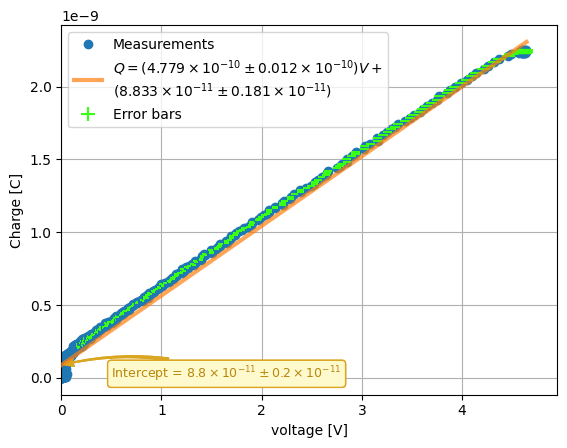

slope=4.780000e-10


In [37]:
plt.plot(V_C1, Qnew_C1, 'o', label='Measurements', color="#1f77b4")
plt.xlabel(r'voltage [V]')
plt.ylabel('Charge [C]')
plt.errorbar(V_C1, Qnew_C1, xerr=V_C1_err, yerr=np.zeros(len(V_C1_err)), linestyle='', ecolor='#39FF14',
             label="Error bars")

# plt.errorbar(Q_C1, V_C1, yerr=V_C1, linestyle='', ecolor='#39FF14', label="Error bars")
plt.grid()

# נבצע רגרסיה ליניארית
fit = linregress(V_C1, Qnew_C1)
# ונוסיף גם אותה לגרף
slope = round(fit.slope, 12)
stderr = round(fit.stderr, 12)
intercept = round(fit.intercept, 12)
intercept_err = round(fit.intercept_stderr, 12)
slope_base, slope_err_base, slope_exp = split_sci(fit.slope, fit.stderr)
intercept_base, intercept_err_base, intercept_exp = split_sci(fit.intercept, fit.intercept_stderr)

lin = np.linspace(0, max(V_C1), 200)
slope_str = sci_notation(slope, stderr)
intercept_str = sci_notation(intercept, intercept_err, 5)

plt.plot(lin, slope * lin + intercept, '-', linewidth=3, color='#ff7f0e', alpha=0.7,
         label=rf"$Q = ({slope_base} \times 10^{{{slope_exp}}} \pm {slope_err_base} \times 10^{{{slope_exp}}})V+$" + "\n" +
               rf"$ ({intercept_base} \times 10^{{{intercept_exp}}} \pm {intercept_err_base} \times 10^{{{intercept_exp}}})$",
         zorder=3)

plt.annotate(
    fr'Intercept = ${intercept_str}$',  #,
    xy=(0, intercept),
    xytext=(.5, 0),
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)

plt.annotate(
    fr'Intercept = ${intercept_str}$',  #,
    xy=(0, intercept),
    xytext=(.5, 0),
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)

max_q = max(Qnew_C1)
plt.annotate(
    fr'Maximal charge = ${max_q}$',  #,
    xy=(max_q, 4),
    # xytext=(3,0),
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=3
)

plt.legend(loc="upper left")
# plt.show()
plt.xlim(left=0)
plt.savefig("voltage_to_charge.svg", format="svg", dpi=400)
# plt.gca().invert_xaxis()
plt.show()
print(f"{slope=:e}")

<div class="alert alert-block alert-info", dir=rtl>
<b>תזכורת:</b> הקשר בין המטען למתח בקבל הוא Q=CV - קשר ליניארי
</div>

<div dir=rtl>
חישוב הקיבול מתוך הגרף:

In [12]:


C1_QCV = slope  #
C1_QCV_err = stderr  #

print(f"{C1_QCV:e} ± {C1_QCV_err:e}")

4.780000e-10 ± 1.000000e-12


<div dir=rtl>
<h3>
   קיבול לפי $\tau = RC$ 
</h3>

<div dir=rtl>
נשרטט גרף עם רגרסיה ליניארית:

220 220


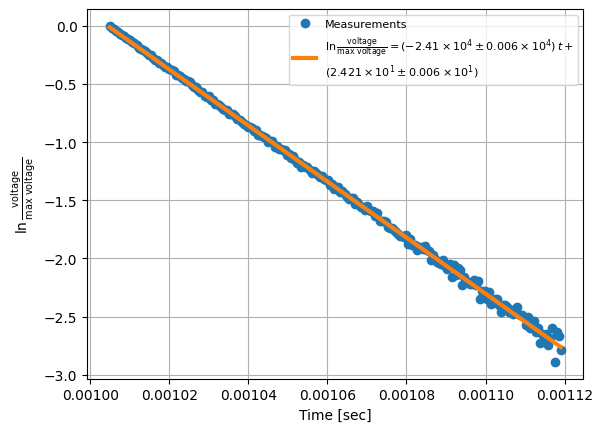

In [63]:
t = t_C1[80: 300]
v = V_C1[80: 300] / max(V_C1[80:300])
ln = np.log(v)
plt.plot(t, ln, 'o', label='Measurements')
plt.xlabel(r'Time [sec]')
plt.ylabel(r'$\ln\frac{{\mathrm{{voltage}}}}{{\mathrm{{max\ voltage}}}}$')
# plt.errorbar(Q_C1, V_C1, yerr=V_C1, linestyle='', ecolor='#39FF14', label="Error bars")
plt.grid()
print(len(t), len(v))

fit = linregress(t, ln)
# ונוסיף גם אותה לגרף
slope = round(fit.slope, 3)
stderr = round(fit.stderr, 3)
intercept = round(fit.intercept, 3)
intercept_err = round(fit.intercept_stderr, 3)
lin = np.linspace(t[0], t[-1], len(t))  # TODO: tau = RC
# plt.plot(lin, slope * t + intercept, '-', linewidth=2.5, color='red', alpha=.8,
#          label=fr"$\ ln(V) = ({slope}\pm{stderr})t + ({intercept}\pm{intercept_err})$",
#          zorder=3)

slope_base, slope_err_base, slope_exp = split_sci(fit.slope, fit.stderr)
intercept_base, intercept_err_base, intercept_exp = split_sci(fit.intercept, fit.intercept_stderr)

lin = np.linspace(t[0], t[-1], 200)
slope_str = sci_notation(slope, stderr)
intercept_str = sci_notation(intercept, intercept_err, 5)

plt.plot(lin, slope * lin + intercept, '-', linewidth=3, color='#ff7f0e', alpha=1,
         label=rf"$\ln\frac{{\mathrm{{voltage}}}}{{\mathrm{{max\ voltage}}}} = ({slope_base} \times 10^{{{slope_exp}}} \pm {slope_err_base} \times 10^{{{slope_exp}}})\,t +$" + "\n" +
               rf"$ ({intercept_base} \times 10^{{{intercept_exp}}} \pm {intercept_err_base} \times 10^{{{intercept_exp}}})$",
         zorder=3)

plt.annotate(
    intercept_str,
    xy=(t[0], intercept),
    xytext=(0.00101, -.5),
    arrowprops=dict(
        arrowstyle='Fancy,tail_width=0.2,head_width=.6,head_length=.8',
        color="goldenrod",
        connectionstyle="arc3,rad=-0.15"
    ),
    fontsize=9,
    color="darkgoldenrod",
    bbox=dict(boxstyle="round,pad=0.3", fc="lemonchiffon", ec="goldenrod", lw=1),
    zorder=2
)

plt.legend(fontsize=8)
# plt.show()
# plt.xlim(left=0)
plt.savefig("time_to_voltage.jpg", dpi=400)
plt.show()

<div dir=rtl>
חישוב הקיבול מתוך הגרף:

In [71]:

tau = -1 / fit.slope
C1_tau = tau / (R1 + R2 + 50)  #
C1_tau_err = 0  #

print(f"Tau: {tau:e} ± {-1/fit.stderr:e}")
print(f"C: {C1_tau:e} ± {C1_tau_err:e}")
print(f"R= {R1 + R2 + 50:e}")

Tau: 4.149090e-05 ± -1.749943e-02
C: 5.436353e-10 ± 0.000000e+00
R= 7.632120e+04


<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ארבעת ערכי הקיבול חופפים בטווחי השגיאה שלהם? האם יש ביניהם חריג?
</div>

[חזרה לתחילת מהלך הניסוי](#mahalah)

[חזרה לתחילת קבל 1](#cap1)

<div dir=rtl>
<h2>
    בחירת קבל 2 (שטח שונה)
<a id="cap2"></a>
</h2>

<br>
תיעוד בחירה: <br>
.

.

.

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> יש לשמור את אותות הפריקה (מהסקופ) מכל קבל ולצרפם להגשה
</div>

#### נתונים

In [15]:
dist2 = (0.62 + 0.55 + 0.70) / 3  #[mm]
dist2_err = 0.01  #

diam2 = 180  # [mm]
diam2_err = 1  # [mm]

epsilon1_eff = epsilon_0  #

C1_calc = (np.pi * (diam1 / 2) ** 2) * epsilon1_eff / dist1
### לא לשכוח לחשב את השגיאה!
C1_calc_err =  #

### אפשר לעגל את השגיאה לסדר מוביל באמצעות:
C1_calc_err = np.round(C1_calc_err, abs(int(np.floor(np.log10(abs(C1_calc_err))))))
### והתאמה, נעגל את ערך הקיבול לאותו סדר גודל
C1_calc = np.round(C1_calc, abs(int(np.floor(np.log10(abs(C1_calc_err))))))

### נציג את שניהם:
print(f"{C1_calc:e} ± {C1_calc_err:e}")

### לחלופין, אפשר גם:
# decimals = abs(int(np.floor(np.log10(abs(C1_calc_err)))))
# print(f"({(n1 := C1_calc / 10**(exp := int(f'{C1_calc:.1e}'.split('e')[1]))):.{decimals}f}".rstrip('0').rstrip('.') + f" ± {(n2 := C1_calc_err / 10**exp):.{decimals}f}".rstrip('0').rstrip('.') + f")e{exp:+d}")
### או אפילו:
# from IPython.display import display, Math
# display(Math(f"({(n1 := C1_calc / 10**(exp := int(f'{C1_calc:.1e}'.split('e')[1]))):.{decimals}f}".rstrip('0').rstrip('.') + f" \pm {(n2 := C1_calc_err / 10**exp):.{decimals}f}".rstrip('0').rstrip('.') + f")\\times 10^{{{exp:+d}}}"))


SyntaxError: invalid syntax (3427628368.py, line 11)

<div dir=rtl>
<h3>
    קיבול לפי נוסחא
</h3>


<div dir=rtl>
<h3>
    קיבול לפי מד הLCR
</h3>


In [ ]:
#0.357 [nano farad]

<div dir=rtl>
<h3>
    קיבול לפי $Q=CV$
</h3>

<div dir=rtl>
<h3>
   קיבול לפי $\tau = RC$ 
</h3>

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ערך הקבל המחושב לבין זה המדוד (לפי השיטה שנבחרה) תואמים ביניהם?
</div>

[חזרה לתחילת מהלך הניסוי](#mahalah)

[חזרה לתחילת קבל 1](#cap1)

[חזרה לתחילת קבל 2](#cap2)

<div dir=rtl>
<h2>
    בחירת קבל 3 (מרווח שונה)
<a id="cap3"></a>
</h2>

<br>
תיעוד בחירה: <br>
.

.

.

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> יש לשמור את אותות הפריקה (מהסקופ) מכל קבל ולצרפם להגשה
</div>

In [ ]:
###נתונים###

In [ ]:
dist3 = (1.06 + 1.13 + 0.97) / 3  # [mm]
dist3_err = 0.01

diam3 = 260  # [mm]
diam3_err = 1  # [mm]

<div dir=rtl>
<h3>
    קיבול לפי נוסחא
</h3>


<div dir=rtl>
<h3>
    קיבול לפי מד הLCR
</h3>


In [ ]:
#0.453 [nano farad]

<div dir=rtl>
<h3>
    קיבול לפי $Q=CV$
</h3>

<div dir=rtl>
<h3>
קיבול לפי $\tau = RC$ 
</h3>

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ערך הקבל המחושב לבין זה המדוד (לפי השיטה שנבחרה) תואמים ביניהם?
</div>

[חזרה לתחילת מהלך הניסוי](#mahalah)

[חזרה לתחילת קבל 1](#cap1)

[חזרה לתחילת קבל 2](#cap2)

[חזרה לתחילת קבל 3](#cap3)

<div dir=rtl>
<h2>
    בחירת קבל 4 (תווך דיאלקטרי)
<a id="cap4"></a>
</h2>

<br>
תיעוד בחירה: <br>
.

.

.

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> יש לשמור את אותות הפריקה (מהסקופ) מכל קבל ולצרפם להגשה
</div>

<div dir=rtl>
<h3>
    קיבול לפי נוסחא
</h3>


In [ ]:
dist1 = (1.65 + 1.86 + 1.87) / 3  #[mm]
dist1_err = 0.03  #

diam1 = 260  # [mm]
diam1_err = 1  # [mm]

<div dir=rtl>
<h3>
    קיבול לפי מד הLCR
</h3>


In [ ]:
#0.474 [nano farad]

<div dir=rtl>
<h3>
    קיבול לפי $Q=CV$
</h3>

<div dir=rtl>
<h3>
   קיבול לפי $\tau = RC$ 
</h3>

<div class="alert alert-block alert-warning", dir=rtl>
<b>בדיקה עצמית:</b> האם ערך הקבל המחושב לבין זה המדוד (לפי השיטה שנבחרה) תואמים ביניהם?
</div>

<div class="alert alert-block alert-danger", dir=rtl>
<b>שימו לב:</b> האם כל הקבצים (קבצי מדידות (csv), קבצי עיבוד, תמונות...) הועלו למודל?
</div>

[חזרה לתחילת מהלך הניסוי](#mahalah)

[חזרה לתחילת קבל 1](#cap1)

[חזרה לתחילת קבל 2](#cap2)

[חזרה לתחילת קבל 3](#cap3)

[חזרה לתחילת קבל 4](#cap4)